**Data Cleaning and Pre-Processing**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import folium

In [60]:
# Uploading the selected dataset for this project
data = pd.read_csv('Major_Crime_Indicators_Open_Data.csv')
display(data)

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
1,-8.814320e+06,5.435514e+06,2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
3,-8.847292e+06,5.429042e+06,4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1420,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232
372897,-8.832606e+06,5.429093e+06,372898,GO-20232990415,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,150,Fenside-Parkwoods,45,Parkwoods-Donalda (45),-79.344651,43.764646


In [61]:
# Checking for duplicate rows based on the column that identifies the crime event
duplicate_rows = data[data.duplicated(subset=['EVENT_UNIQUE_ID'])]
print("Duplicate rows based on 'EVENT_UNIQUE_ID':")
display(duplicate_rows)

Duplicate rows based on 'EVENT_UNIQUE_ID':


,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
11,-8.814320e+06,5.435514e+06,12,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
40,-8.813613e+06,5.428591e+06,41,GO-20141260831,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,220,B&E W'Intent,Break and Enter,136,West Hill,136,West Hill (136),-79.174031,43.761395
42,-8.838988e+06,5.411068e+06,43,GO-20141260912,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401983,43.647598
52,6.327780e-09,5.664924e-09,53,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
55,-8.809036e+06,5.431523e+06,56,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372886,-8.830003e+06,5.413789e+06,372887,GO-20232992841,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1457,100,Pointing A Firearm,Assault,65,Greenwood-Coxwell,65,Greenwood-Coxwell (65),-79.321264,43.665279
372888,-8.840677e+06,5.414066e+06,372889,GO-20232992925,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1460,100,Assault Peace Officer,Assault,95,Annex,95,Annex (95),-79.417150,43.667080
372889,-8.824422e+06,5.429589e+06,372890,GO-20232988215,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,156,Bendale-Glen Andrew,127,Bendale (127),-79.271134,43.767864
372891,-8.840677e+06,5.414066e+06,372892,GO-20232992925,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1460,100,Assault Peace Officer,Assault,95,Annex,95,Annex (95),-79.417150,43.667080


In [62]:
# Removing duplicate rows from the dataset
data.drop_duplicates(subset = ['EVENT_UNIQUE_ID'], inplace = True)
display("Dataset after removing duplicate rows:")
display(data)

'Dataset after removing duplicate rows:'

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
1,-8.814320e+06,5.435514e+06,2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
3,-8.847292e+06,5.429042e+06,4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1420,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,372894,GO-20232989815,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,210,Unlawfully In Dwelling-House,Break and Enter,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232


In [63]:
# Checking for missing values per column
missing_values = data.isnull().sum()
display("Missing values per column:")
display(missing_values)

'Missing values per column:'

X                     0
Y                     0
OBJECTID              0
EVENT_UNIQUE_ID       0
REPORT_DATE           0
OCC_DATE              0
REPORT_YEAR           0
REPORT_MONTH          0
REPORT_DAY            0
REPORT_DOY            0
REPORT_DOW            0
REPORT_HOUR           0
OCC_YEAR             88
OCC_MONTH            88
OCC_DAY              88
OCC_DOY              88
OCC_DOW              88
OCC_HOUR              0
DIVISION              0
LOCATION_TYPE         0
PREMISES_TYPE         0
UCR_CODE              0
UCR_EXT               0
OFFENCE               0
MCI_CATEGORY          0
HOOD_158              0
NEIGHBOURHOOD_158     0
HOOD_140              0
NEIGHBOURHOOD_140     0
LONG_WGS84            0
LAT_WGS84             0
dtype: int64

In [64]:
# Since there are only a few missing values, I chose to omit them by removing rows
data.dropna(inplace=True)
display("Dataset after omitting missing values:")
display(data)

'Dataset after omitting missing values:'

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
1,-8.814320e+06,5.435514e+06,2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
3,-8.847292e+06,5.429042e+06,4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1420,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,372894,GO-20232989815,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,210,Unlawfully In Dwelling-House,Break and Enter,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232


In [65]:
# Dropping rows containing years of crime occurrence from 2000 to 2013
drop_rows = data['OCC_YEAR'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
data.drop(data[drop_rows].index, inplace=True)
display("Dataset after dropping rows with year of crime occurrence from 2000 to 2013:")
display(data)

'Dataset after dropping rows with year of crime occurrence from 2000 to 2013:'

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
5,-8.840629e+06,5.412225e+06,6,GO-20141260618,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,81,Trinity-Bellwoods,81,Trinity-Bellwoods (81),-79.416718,43.655115
6,-8.839460e+06,5.423396e+06,7,GO-20141260730,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,105,Lawrence Park North,105,Lawrence Park North (105),-79.406223,43.727681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,372894,GO-20232989815,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,210,Unlawfully In Dwelling-House,Break and Enter,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232


In [66]:
# Dropping NSA from HOOD_158 and NEIGHBOURHOOD_158
filtered_indices = data[(data['HOOD_158'] == 'NSA') | (data['NEIGHBOURHOOD_158'] == 'NSA')].index
data.drop(filtered_indices, inplace=True)
display("Dataset after dropping rows with NSA value:")
display(data)

'Dataset after dropping rows with NSA value:'

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
5,-8.840629e+06,5.412225e+06,6,GO-20141260618,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,81,Trinity-Bellwoods,81,Trinity-Bellwoods (81),-79.416718,43.655115
6,-8.839460e+06,5.423396e+06,7,GO-20141260730,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,105,Lawrence Park North,105,Lawrence Park North (105),-79.406223,43.727681
7,-8.813613e+06,5.428591e+06,8,GO-20141260831,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,136,West Hill,136,West Hill (136),-79.174031,43.761395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,372894,GO-20232989815,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,210,Unlawfully In Dwelling-House,Break and Enter,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232


In [67]:
data.describe()

,X,Y,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84
count,3.186540e+05,3.186540e+05,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000,318654.000000
mean,-8.838607e+06,5.420134e+06,187032.619619,2018.816459,15.754109,187.391035,12.667429,2018.783891,15.504343,186.653116,12.552154,1731.737938,150.119556,-79.398554,43.706476
std,1.147385e+04,8.112682e+03,107776.434727,2.906880,8.759566,103.833260,6.407106,2.903225,8.888140,104.037461,7.241752,334.576159,52.518228,0.103071,0.052677
min,-8.865400e+06,5.401672e+06,1.000000,2014.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1410.000000,100.000000,-79.639247,43.586487
25%,-8.847180e+06,5.413101e+06,93642.250000,2016.000000,8.000000,99.000000,8.000000,2016.000000,8.000000,98.000000,7.000000,1430.000000,100.000000,-79.475567,43.660811
50%,-8.838360e+06,5.419156e+06,187201.500000,2019.000000,16.000000,190.000000,13.000000,2019.000000,16.000000,189.000000,14.000000,1461.000000,110.000000,-79.396335,43.700147
75%,-8.830772e+06,5.426980e+06,280536.750000,2021.000000,23.000000,277.000000,18.000000,2021.000000,23.000000,276.000000,19.000000,2120.000000,200.000000,-79.328176,43.750942
max,-8.807826e+06,5.442747e+06,372898.000000,2023.000000,31.000000,366.000000,23.000000,2023.000000,31.000000,366.000000,23.000000,2135.000000,230.000000,-79.122044,43.853164


In [68]:
# Checking data types of each column
print(data.dtypes)

X                    float64
Y                    float64
OBJECTID               int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR            int64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR               int64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
LONG_WGS84           float64
LAT_WGS84            float64
dtype: object


In [69]:
# Converting float type variables to integer data type
float_variables = ['OCC_YEAR', 'OCC_DAY', 'OCC_DOY']
for col in float_variables:
    data[col] = data[col].astype(int)

# Converting object type variables to category data type
object_variables = ['REPORT_MONTH', 'REPORT_DOW', 'OCC_MONTH', 'OCC_DOW', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE',
                    'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140']
for col1 in object_variables:
    data[col1] = data[col1].astype('category')

print(data.dtypes)

X                     float64
Y                     float64
OBJECTID                int64
EVENT_UNIQUE_ID        object
REPORT_DATE            object
OCC_DATE               object
REPORT_YEAR             int64
REPORT_MONTH         category
REPORT_DAY              int64
REPORT_DOY              int64
REPORT_DOW           category
REPORT_HOUR             int64
OCC_YEAR                int64
OCC_MONTH            category
OCC_DAY                 int64
OCC_DOY                 int64
OCC_DOW              category
OCC_HOUR                int64
DIVISION             category
LOCATION_TYPE        category
PREMISES_TYPE        category
UCR_CODE                int64
UCR_EXT                 int64
OFFENCE              category
MCI_CATEGORY         category
HOOD_158             category
NEIGHBOURHOOD_158    category
HOOD_140             category
NEIGHBOURHOOD_140    category
LONG_WGS84            float64
LAT_WGS84             float64
dtype: object


**Preliminar Analysis**

In [70]:
# Counting crime occurrences per year and per type of crime
crime_count_table = data.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)
crime_count_table['Total'] = crime_count_table.sum(axis=1)
print(crime_count_table)

MCI_CATEGORY  Assault  Auto Theft  Break and Enter  Robbery  Theft Over  Total
OCC_YEAR                                                                      
2014            13826        3409             7073     2816         985  28109
2015            14753        3050             6790     2711        1005  28309
2016            15530        2994             6230     2825         989  28568
2017            15907        3280             6733     3031        1134  30085
2018            16418        4223             7460     2867        1224  32192
2019            17210        4712             8298     2680        1297  34197
2020            15169        5061             6750     2061        1152  30193
2021            15821        5844             5477     1687        1018  29847
2022            17708        8602             5810     2058        1342  35520
2023            19797       10781             7206     2307        1543  41634


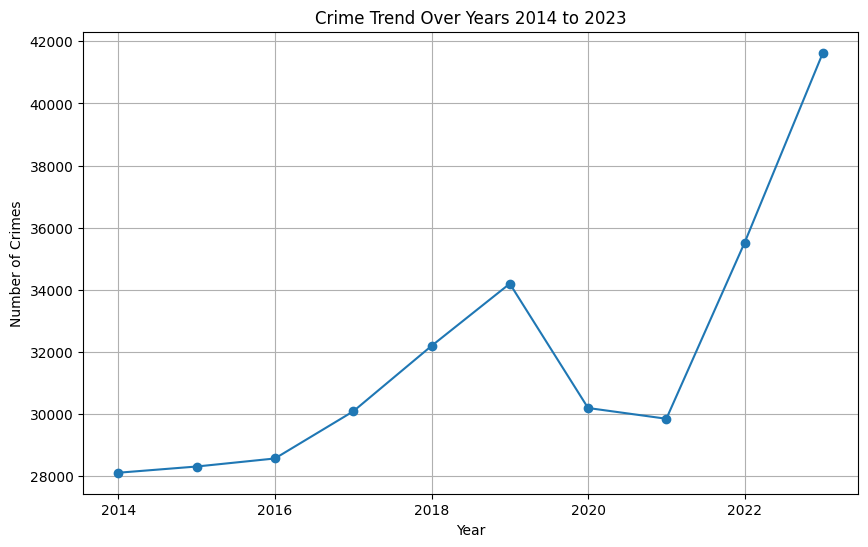

In [71]:
# Plotting the crime trend over years
crime_trend = data.groupby('OCC_YEAR').size()
plt.figure(figsize=(10, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
plt.title('Crime Trend Over Years 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

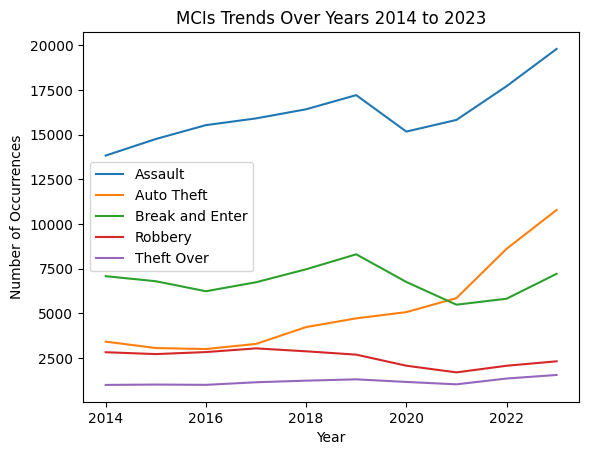

In [72]:
# Plotting crime trends for each Major Crime Indicator category
trend_data = data.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)
for category in trend_data.columns:
    plt.plot(trend_data.index, trend_data[category], label=category)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('MCIs Trends Over Years 2014 to 2023')
plt.legend(loc='center left')
plt.show()

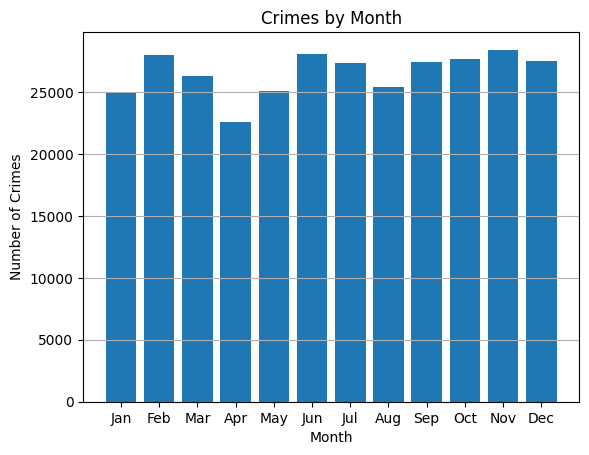

In [73]:
# Bar Plot showing crimes by month
crime_count_per_month = data.groupby('OCC_MONTH').size()
plt.bar(range(1, 13), crime_count_per_month.values)
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Month')
plt.grid(axis='y')
plt.show()

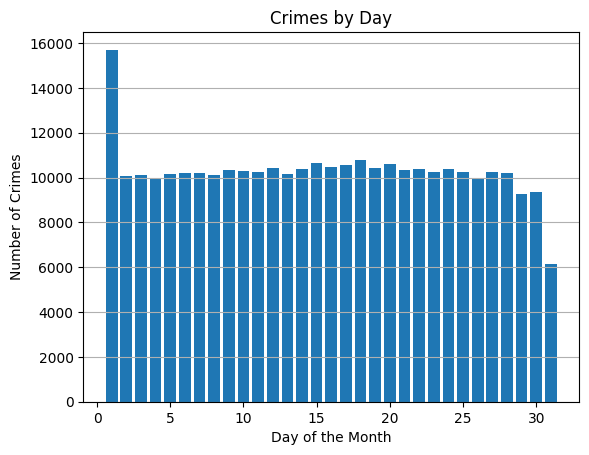

In [74]:
# Bar Plot showing crimes by day
crime_count_per_day = data.groupby('OCC_DAY').size()
plt.bar(crime_count_per_day.index, crime_count_per_day.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Day')
plt.grid(axis='y')
plt.show()

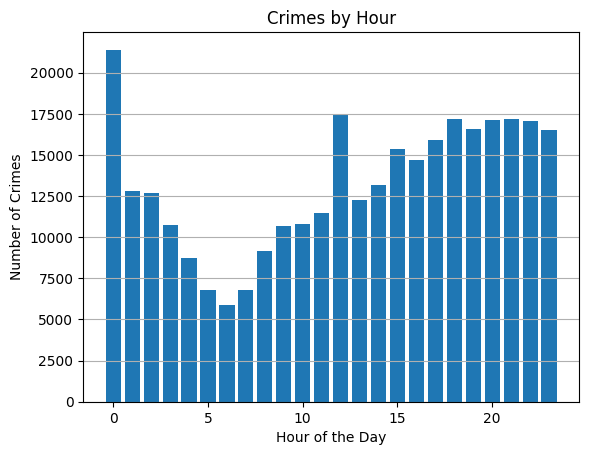

In [75]:
# Bar Plot showing crimes by hour
crime_count_per_hour = data.groupby('OCC_HOUR').size()
plt.bar(crime_count_per_hour.index, crime_count_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Hour')
plt.grid(axis='y')
plt.show()

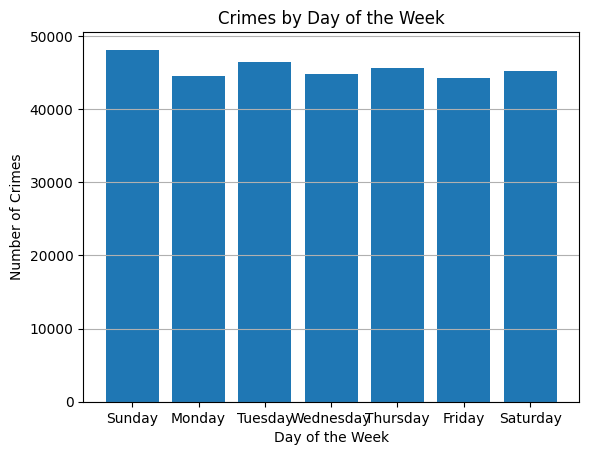

In [76]:
# Bar plot showing crimes by day of the week
crime_count_per_day_of_week = data.groupby('OCC_DOW').size()
days_of_week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(crime_count_per_day_of_week.index, crime_count_per_day_of_week.values, tick_label=days_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Day of the Week')
plt.grid(axis='y')
plt.show()

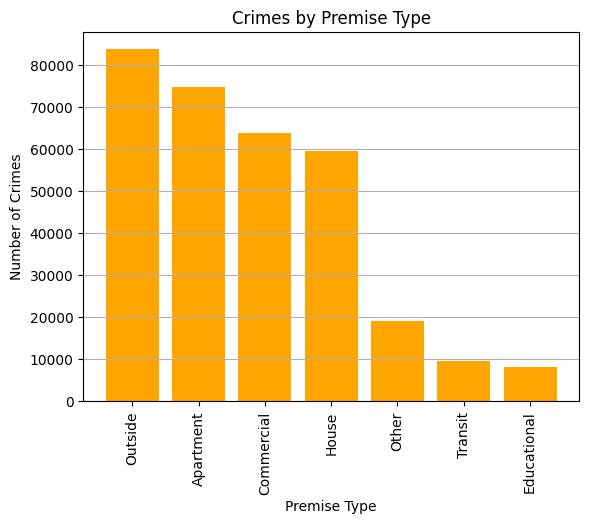

In [77]:
# Bar plot for crimes by premises type
crime_count_per_premise_type = data['PREMISES_TYPE'].value_counts()
plt.bar(crime_count_per_premise_type.index, crime_count_per_premise_type.values, color='orange')
plt.xlabel('Premise Type')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Premise Type')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

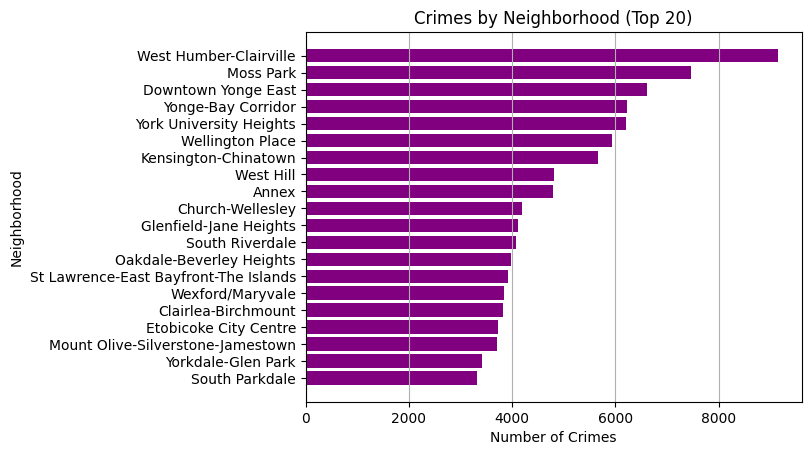

In [78]:
# Most dangerous neighborhoods (Top 20)
crime_count_per_neighborhood = data['NEIGHBOURHOOD_158'].value_counts()
top_20_neighborhoods = crime_count_per_neighborhood.head(20)
plt.barh(top_20_neighborhoods.index, top_20_neighborhoods.values, color='purple')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Top 20)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

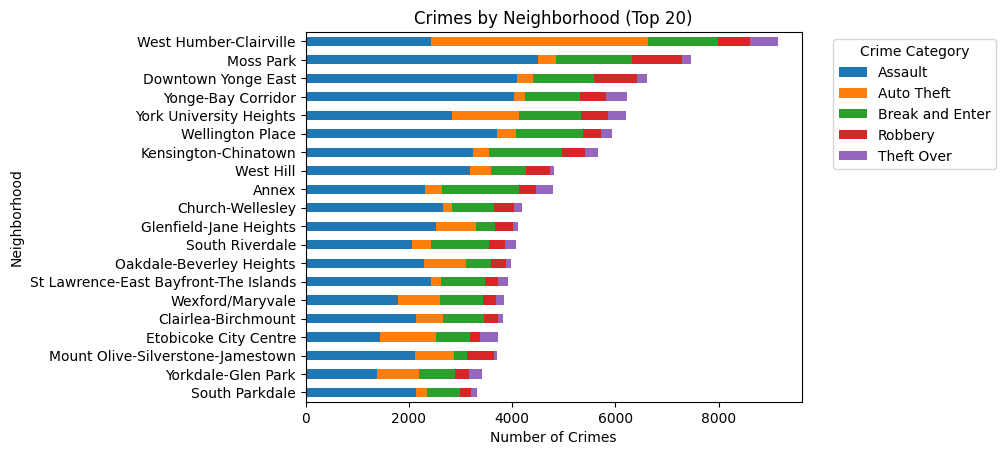

In [79]:
# Crime by neighborhood and MCI_CATEGORY in the most dangerous neighbourhoods
crime_count_per_neighborhood_category = data.groupby(['NEIGHBOURHOOD_158', 'MCI_CATEGORY']).size().unstack(fill_value=0)
top_20_neighborhoods = crime_count_per_neighborhood_category.sum(axis=1).nlargest(20).index
top_20_data = crime_count_per_neighborhood_category.loc[top_20_neighborhoods]

top_20_data.plot(kind='barh', stacked=True, color=plt.cm.tab10.colors)
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Top 20)')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.show()

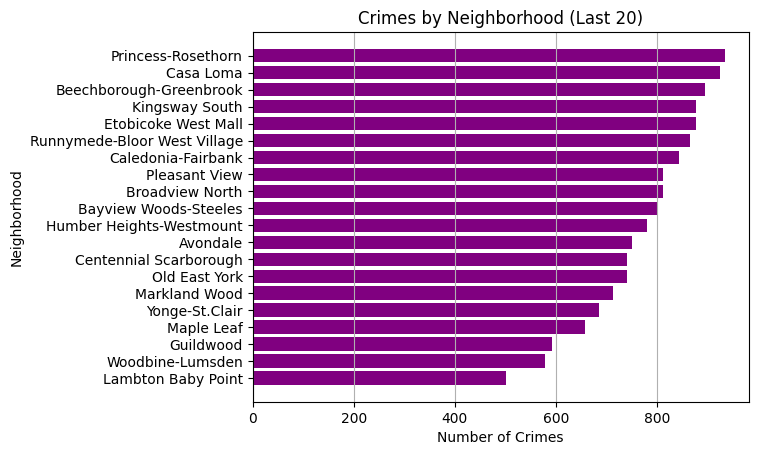

In [80]:
# Least dangerous neighborhood (Last 20)
crime_count_per_neighborhood = data['NEIGHBOURHOOD_158'].value_counts()
last_20_neighborhoods = crime_count_per_neighborhood.tail(20)
plt.barh(last_20_neighborhoods.index, last_20_neighborhoods.values, color='purple')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Last 20)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

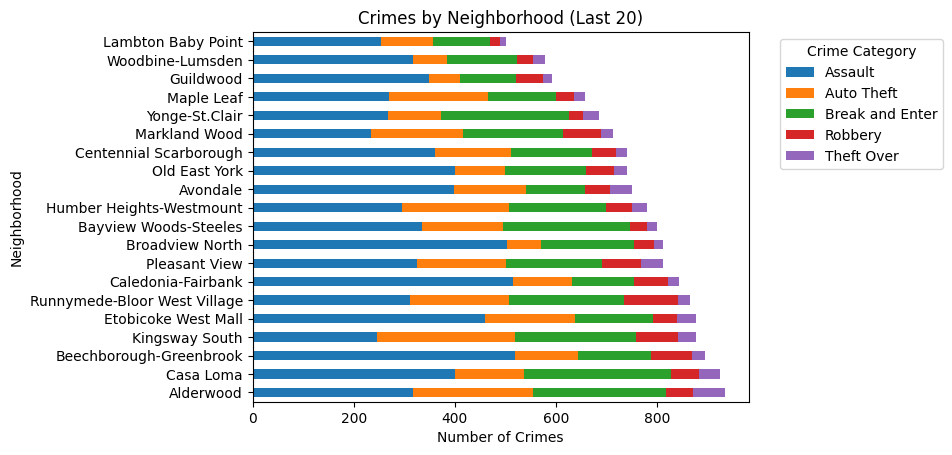

In [81]:
# Crime by neighborhood and MCI_CATEGORY in the least dangerous neighbourhoods
crime_count_per_neighborhood_category = data.groupby(['NEIGHBOURHOOD_158', 'MCI_CATEGORY']).size().unstack(fill_value=0)
last_20_neighborhoods = crime_count_per_neighborhood_category.sum(axis=1).nsmallest(20).index
last_20_data = crime_count_per_neighborhood_category.loc[last_20_neighborhoods]

last_20_data.plot(kind='barh', stacked=True, color=plt.cm.tab10.colors)
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Crimes by Neighborhood (Last 20)')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.show()

In [82]:
# Creating a map centered around Toronto
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=10)
limited_data = data.iloc[:1000]

for index, row in limited_data.iterrows():
    folium.CircleMarker(
        location=[row['LAT_WGS84'], row['LONG_WGS84']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(toronto_map)

toronto_map
# Save the map as an HTML file
#toronto_map.save("toronto_map.html")